In [ ]:
#import pages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/My Drive/DSP Project/diabetic_data.csv')
mapdf = pd.read_csv('/content/drive/My Drive/DSP Project/mapping.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**1. Understand the Data**

In [ ]:
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [ ]:
df.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


In [ ]:
df.size

5088300

In [ ]:
df.shape
mapdf.shape

(63, 3)

**2. Data Cleaning**

In [ ]:
#checking number of columns with null values
na_counts = df.isna().sum()
na_columns = na_counts[na_counts > 0]
print(na_columns)

max_glu_serum    96420
A1Cresult        84748
dtype: int64


**3. Univariate Analysis**

In [ ]:
df['race'].value_counts()

,count
race,
Caucasian,76099
AfricanAmerican,19210
?,2273
Hispanic,2037
Other,1506
Asian,641


In [ ]:


for column in df.select_dtypes(include=['object']).columns:
    print(f"Column Name: {column}")
    print(df[column].value_counts())



Column Name: race
race
Caucasian          76099
AfricanAmerican    19210
?                   2273
Hispanic            2037
Other               1506
Asian                641
Name: count, dtype: int64
Column Name: gender
gender
Female             54708
Male               47055
Unknown/Invalid        3
Name: count, dtype: int64
Column Name: age
age
[70-80)     26068
[60-70)     22483
[50-60)     17256
[80-90)     17197
[40-50)      9685
[30-40)      3775
[90-100)     2793
[20-30)      1657
[10-20)       691
[0-10)        161
Name: count, dtype: int64
Column Name: weight
weight
?            98569
[75-100)      1336
[50-75)        897
[100-125)      625
[125-150)      145
[25-50)         97
[0-25)          48
[150-175)       35
[175-200)       11
>200             3
Name: count, dtype: int64
Column Name: payer_code
payer_code
?     40256
MC    32439
HM     6274
SP     5007
BC     4655
MD     3532
CP     2533
UN     2448
CM     1937
OG     1033
PO      592
DM      549
CH      146
WC      135


In [ ]:
for column in df.select_dtypes(include=['int64']).columns:
    print(f"Column Name: {column}")
    print(df[column].value_counts())

Column Name: encounter_id
encounter_id
2278392      1
190792044    1
190790070    1
190789722    1
190786806    1
            ..
106665324    1
106657776    1
106644876    1
106644474    1
443867222    1
Name: count, Length: 101766, dtype: int64
Column Name: patient_nbr
patient_nbr
88785891     40
43140906     28
1660293      23
88227540     23
23199021     23
             ..
11005362      1
98252496      1
1019673       1
13396320      1
175429310     1
Name: count, Length: 71518, dtype: int64
Column Name: admission_type_id
admission_type_id
1    53990
3    18869
2    18480
6     5291
5     4785
8      320
7       21
4       10
Name: count, dtype: int64
Column Name: discharge_disposition_id
discharge_disposition_id
1     60234
3     13954
6     12902
18     3691
2      2128
22     1993
11     1642
5      1184
25      989
4       815
7       623
23      412
13      399
14      372
28      139
8       108
15       63
24       48
9        21
17       14
16       11
19        8
10        

From the above columns

<ipython-input-12-4f54591ea60e>:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")  # Rotate x-axis labels if needed
<ipython-input-12-4f54591ea60e>:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")  # Rotate x-axis labels if needed
<ipython-input-12-4f54591ea60e>:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")  # Rotate x-axis labels if needed
<ipython-input-12-4f54591ea60e>:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabel

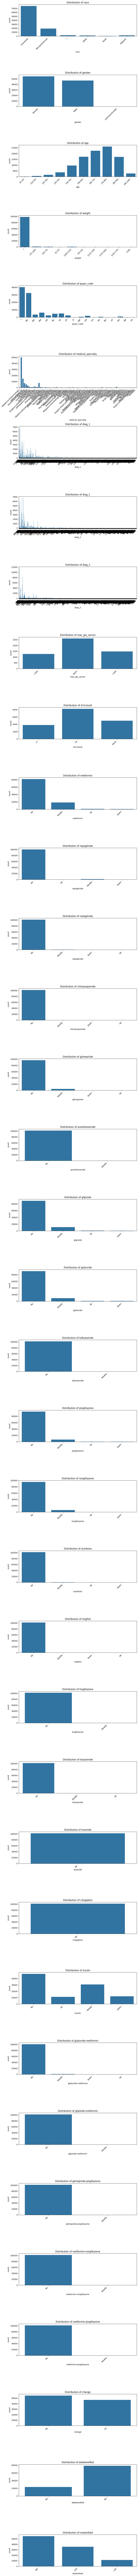

In [ ]:


# Select object columns
object_cols = df.select_dtypes(include=['object']).columns

# Create subplots for each object column
fig, axes = plt.subplots(nrows=len(object_cols), ncols=1, figsize=(10, 5*len(object_cols)))

# Iterate over object columns and plot distributions
for i, col in enumerate(object_cols):
    ax = axes[i]  # Get the current subplot
    sns.countplot(x=col, data=df, ax=ax)
    ax.set_title(f"Distribution of {col}")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")  # Rotate x-axis labels if needed

plt.tight_layout()  # Adjust spacing between subplots
plt.show()

Following are the observation beased on the Univariate Analysis
---
*   Following columns have question mark that need to be handled if neded. Race, weight, payer
*   Most of the weight is not filled the column can be deleted
*   Too many distinct values present in medical_specialty, diag_1, diag_2, diag_3, difficult to encode
*   examide and citoglipton have only No value, can be delete not needed for the model.
=




In [ ]:
df.replace('?', np.nan, inplace=True)

In [ ]:
df = df.drop(columns=['weight', 'examide', 'citoglipton'])

In [ ]:
na_counts = df.isna().sum()
na_columns = na_counts[na_counts > 0]
print(na_columns)

race                  2273
payer_code           40256
medical_specialty    49949
diag_1                  21
diag_2                 358
diag_3                1423
max_glu_serum        96420
A1Cresult            84748
dtype: int64


Dependent variable readmitted has 3 unique value >30, <30 and NO. We shall convert it into two different column readmitted within 30 days and another with just readmission (it will have value for both admission within 30 days and admission after 30 days).

In [ ]:
df['readmitted_within_30'] = np.where(df['readmitted'] == '<30', 1, 0)

df['readmitted'] = np.where(df['readmitted'] != 'NO', 1, 0)

df = df.drop(columns=['readmitted'])


In [ ]:
def categorical_summary(df, columns):
  summary = {}
  for column in columns:
    if df[column].dtype == 'object':  # Check if column is categorical
      category_counts = df[column].value_counts(dropna=False)
      category_percentages = (category_counts / len(df)) * 100
      summary[column] = pd.DataFrame({
          'Count': category_counts,
          'Percentage': category_percentages
      })
  return summary
categorical_columns = ['metformin','repaglinide','nateglinide','chlorpropamide','glimepiride','acetohexamide','glipizide','glyburide','tolbutamide','pioglitazone','rosiglitazone','acarbose','miglitol','troglitazone','tolazamide','insulin','glyburide-metformin','glipizide-metformin','glimepiride-pioglitazone','metformin-rosiglitazone','metformin-pioglitazone']
summary_result = categorical_summary(df, categorical_columns)
for column, summary_df in summary_result.items():
  print(f"Summary for column: {column}")
  print(summary_df)
  print("\n")

Summary for column: metformin
           Count  Percentage
metformin                   
No         81778   80.358862
Steady     18346   18.027632
Up          1067    1.048484
Down         575    0.565022


Summary for column: repaglinide
              Count  Percentage
repaglinide                    
No           100227   98.487707
Steady         1384    1.359983
Up              110    0.108091
Down             45    0.044219


Summary for column: nateglinide
              Count  Percentage
nateglinide                    
No           101063   99.309200
Steady          668    0.656408
Up               24    0.023584
Down             11    0.010809


Summary for column: chlorpropamide
                 Count  Percentage
chlorpropamide                    
No              101680   99.915492
Steady              79    0.077629
Up                   6    0.005896
Down                 1    0.000983


Summary for column: glimepiride
             Count  Percentage
glimepiride                   
N

In [ ]:
#We can drop the columns where the No values are greater than 99.9%
delcols = ['metformin-pioglitazone','metformin-rosiglitazone','glimepiride-pioglitazone','glipizide-metformin','tolazamide','troglitazone','miglitol','tolbutamide','acetohexamide','chlorpropamide']
df = df.drop(columns=delcols)

**4. Bivariate analysis**

The null values constitue greater than 90% for max_glu_serum and greater than 80% A1Cresult. Comparing between binary and ordinal encoding

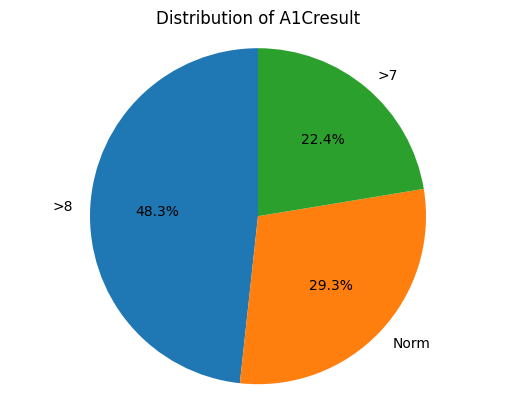

In [ ]:
category_counts = df['A1Cresult'].value_counts()
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Distribution of A1Cresult')
plt.show()

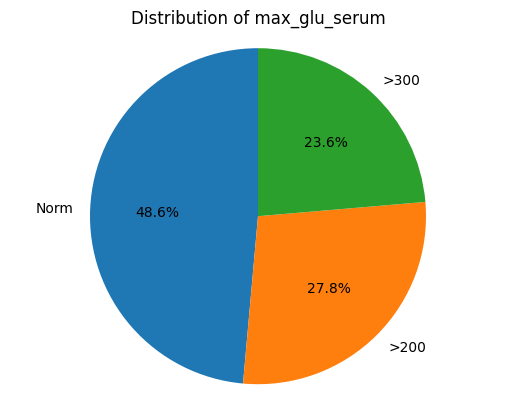

In [ ]:
category_counts = df['max_glu_serum'].value_counts()
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Distribution of max_glu_serum')
plt.show()

<Axes: xlabel='max_glu_serum'>

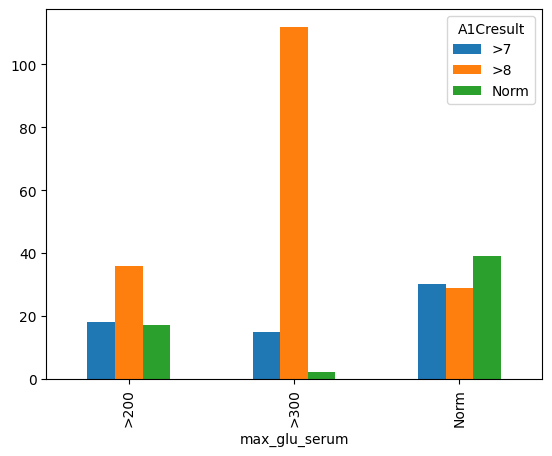

In [ ]:
pd.crosstab(df['max_glu_serum'], df['A1Cresult']).plot(kind='bar')

In [ ]:

#binaryencoding
df['max_glu_serum_high'] = np.where(df['max_glu_serum'].isin(['>200', '>300']), 1, 0)
df['A1Cresult_high'] = np.where(df['A1Cresult'].isin(['>7','>8']), 1, 0)

In [ ]:
covariance_result = df[['max_glu_serum_high', 'A1Cresult_high', 'readmitted_within_30']].cov()
print(covariance_result)
correlation_result = df[['max_glu_serum_high', 'A1Cresult_high', 'readmitted_within_30']].corr()
print(correlation_result)


                      max_glu_serum_high  A1Cresult_high  readmitted_within_30
max_glu_serum_high              0.026284       -0.001414              0.000582
A1Cresult_high                 -0.001414        0.104224             -0.001457
readmitted_within_30            0.000582       -0.001457              0.099146
                      max_glu_serum_high  A1Cresult_high  readmitted_within_30
max_glu_serum_high              1.000000       -0.027019              0.011398
A1Cresult_high                 -0.027019        1.000000             -0.014337
readmitted_within_30            0.011398       -0.014337              1.000000


In [ ]:
# ordinal encoding
mapping = {'NaN': 0, 'Norm': 1, '>200': 2, '>300': 3}
df['glu_enc'] = df['max_glu_serum'].map(mapping)
mapping = {'NaN': 0, 'Norm': 1, '>7': 2, '>8': 3}
df['a1c_enc'] = df['A1Cresult'].map(mapping)


In [ ]:
covariance_result = df[['glu_enc', 'a1c_enc', 'readmitted_within_30']].cov()
print(covariance_result)
correlation_result = df[['glu_enc', 'a1c_enc', 'readmitted_within_30']].corr()
print(correlation_result)

                       glu_enc   a1c_enc  readmitted_within_30
glu_enc               0.660173  0.362360              0.009507
a1c_enc               0.362360  0.740111              0.000663
readmitted_within_30  0.009507  0.000663              0.099146
                       glu_enc   a1c_enc  readmitted_within_30
glu_enc               1.000000  0.525428              0.035544
a1c_enc               0.525428  1.000000              0.002588
readmitted_within_30  0.035544  0.002588              1.000000


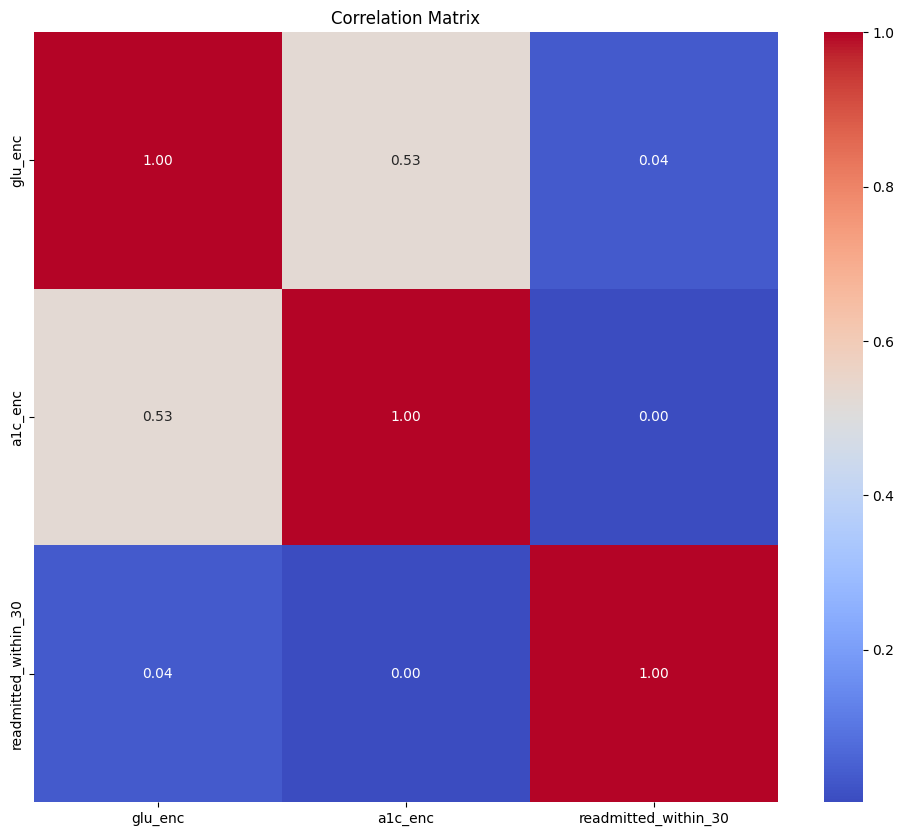

In [ ]:
plt.figure(figsize=(12, 10))  # Adjust figure size as needed
sns.heatmap(correlation_result, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

**5. Multivariate Analysis**

Preparing independent variables by
encoding for feature engineering

both the glu and a1c test has positive correlation to readmission

In [ ]:
#understanding correlation with other numeric columns
selected_columns = ['num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses', 'readmitted_within_30']
covariance_matrix = df[selected_columns].cov()
print(covariance_matrix)
correlation_matrix = df[selected_columns].corr()
print(correlation_matrix)

                      num_lab_procedures  num_procedures  num_medications  \
num_lab_procedures            387.080530        1.948719        42.880139   
num_procedures                  1.948719        2.909777         5.348300   
num_medications                42.880139        5.348300        66.057332   
number_outpatient              -0.189544       -0.053651         0.465523   
number_emergency               -0.041729       -0.060598         0.099673   
number_inpatient                0.974736       -0.142686         0.658892   
number_diagnoses                5.811858        0.243200         4.110004   
readmitted_within_30            0.126151       -0.006567         0.098353   

                      number_outpatient  number_emergency  number_inpatient  \
num_lab_procedures            -0.189544         -0.041729          0.974736   
num_procedures                -0.053651         -0.060598         -0.142686   
num_medications                0.465523          0.099673          0.

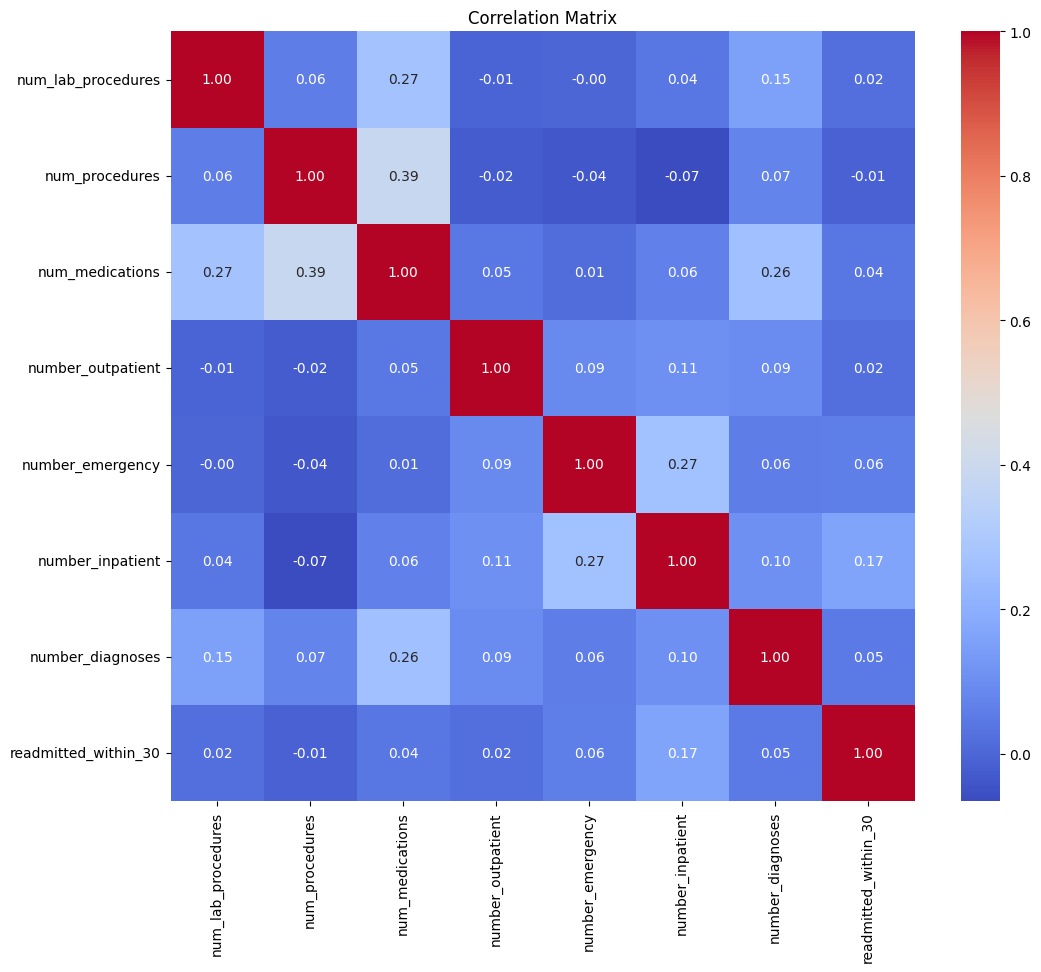

In [ ]:
plt.figure(figsize=(12, 10))  # Adjust figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [ ]:
#binary encoding
medication_columns = ['metformin', 'repaglinide', 'nateglinide', 'glimepiride', 'glipizide', 'glyburide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'insulin', 'glyburide-metformin']

for medication in medication_columns:
  # Create a new column named medication_name + '_taken'
  column_name = medication + '_taken'
  df[column_name] = np.where(df[medication] == 'No', 0, 1)

In [ ]:
# Binary encoding for 'change' and 'diabetesMed' columns
change_encoded_column = 'change_encoded'  # Name for the new encoded column for 'change'
diabetesMed_encoded_column = 'diabetesMed_encoded'  # Name for the new encoded column for 'diabetesMed'

df[change_encoded_column] = np.where(df['change'] == 'Ch', 1, 0)
df[diabetesMed_encoded_column] = np.where(df['diabetesMed'] == 'Yes', 1, 0)

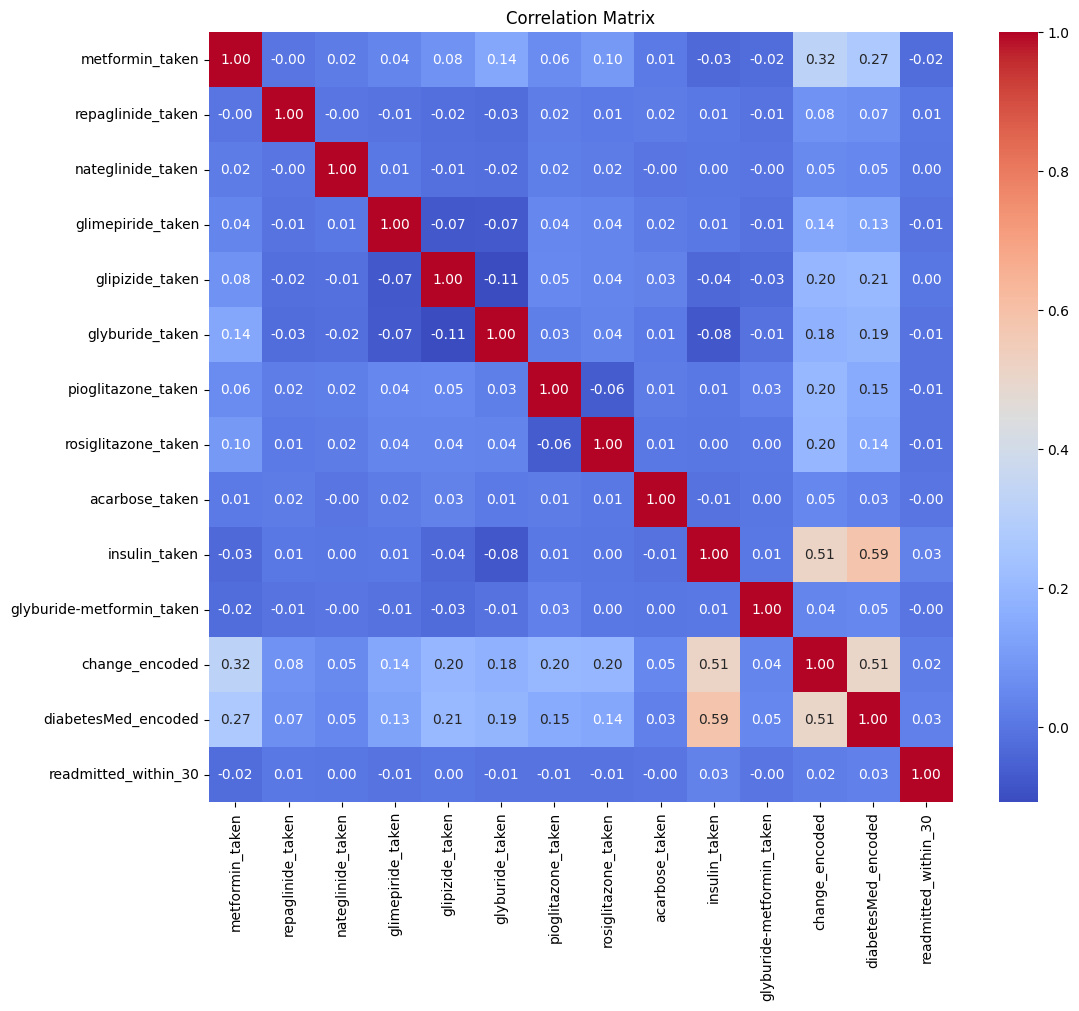

In [ ]:
med_cols_taken = ['metformin_taken', 'repaglinide_taken', 'nateglinide_taken', 'glimepiride_taken', 'glipizide_taken', 'glyburide_taken', 'pioglitazone_taken', 'rosiglitazone_taken', 'acarbose_taken', 'insulin_taken', 'glyburide-metformin_taken', 'change_encoded','diabetesMed_encoded','readmitted_within_30', 'readmitted']
med_cov = df[med_cols_taken].cov()
med_cor = df[med_cols_taken].corr()
plt.figure(figsize=(12, 10))  # Adjust figure size as needed
sns.heatmap(med_cor, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

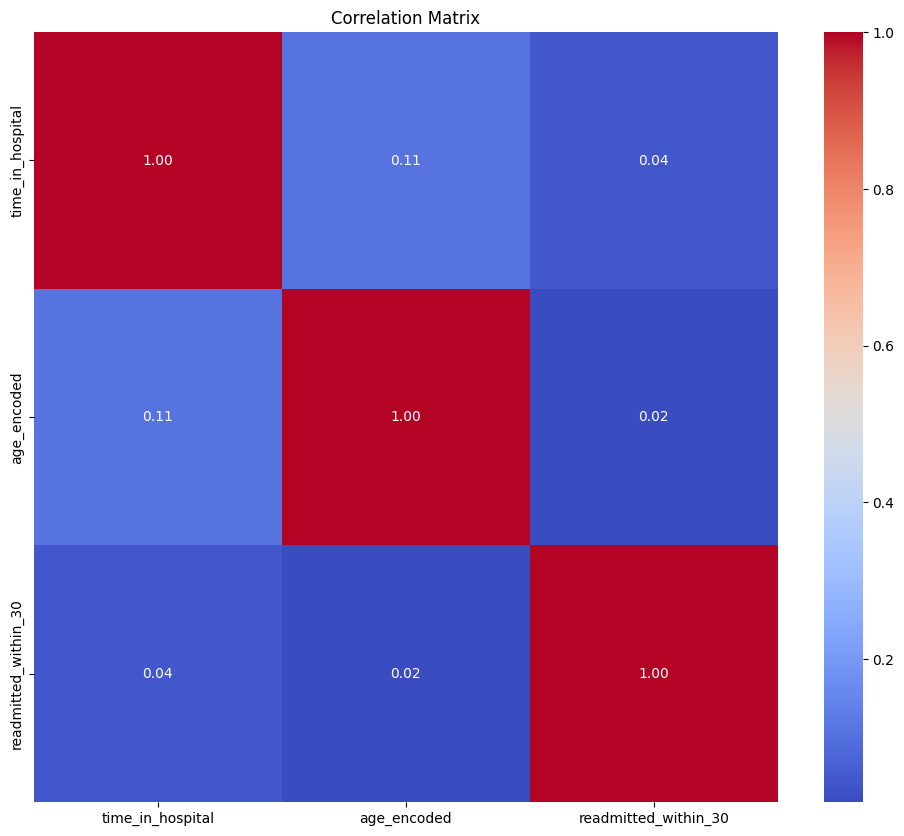

In [ ]:
#encoding age
age_categories = [
    '[0-10)', '[10-20)', '[20-30)', '[30-40)', '[40-50)', '[50-60)',
    '[60-70)', '[70-80)', '[80-90)', '[90-100)'
]
age_mapping = {category: i for i, category in enumerate(age_categories)}
df['age_encoded'] = df['age'].map(age_mapping)

other_col = ['time_in_hospital', 'age_encoded', 'readmitted_within_30', 'readmitted']
other_cov = df[other_col].cov()
other_cor = df[other_col].corr()
plt.figure(figsize=(12, 10))  # Adjust figure size as needed
sns.heatmap(other_cor, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()



In [ ]:

# Calculate the percentage
percentage = (df['readmitted_within_30'].sum() / len(df)) * 100

# Print the result
print(f"Percentage of data with readmitted_within_30 set: {percentage:.2f}%")

Percentage of data with readmitted_within_30 set: 11.16%


**6. Feature Engineering**

**7. Data Distribution and Assumptions**


**8. Data Visualization**

**9. Documentation of Findings**

**10. Preparation for Modeling**